## Some ideas for a numerical solution to the SPACE model: Stream Power with Alluvium Conservation and Entrainment
Running a time loop, seeing if things are realistic.
Basic equation set so far, for 1D. Sediment flux downstream:

$$\frac{dq_s}{dx} = K_s q S (1-\exp (-H/H_* ) ) + (1-F_f) K_r q S \exp (-H/H_*) -Vq_s/q$$

Rate of change of alluv thickness:

$$(1-\phi ) \frac{\partial H}{\partial t} = V q_s/q - K_s q S (1-\exp (-H/H_* ) )$$

Rate of change of rock elev:

$$\frac{\partial R}{\partial t} = U - K_r q S \exp (-H/H_* )$$

Local analytical solution for sediment flux within a cell:

$$q_s = \left( \frac{E_s+(1-F_f)E_r}{V/q} \right) \left( 1-\exp (-Vx/q) \right) + q_{s0} \exp (-Vx/q)$$

Try a little 1D version with some initial slope $S_0$:

 - time units are years, distance units are meters
 - in this version, q increases as a function of distance downstream.

In [295]:
import numpy as np
num_nodes = 50
dx = 1.0
S0 = 0.01
V = 1.0e-9 # settling velocity, equivalent to 3 mm/s or so
Ff = 0.5
Ks = 0.001 # sed erodibility. not necessarily realistic
Kr = 0.000001
Hstar = 0.1 # sed thickness req'd for full entrainment potential. Not necessarily realistic.
dt = 0.1 # years
total_time = 5000.0
num_time_steps = int(total_time / dt)
U = 1.0e-3 # 1 mm/yr
r = 0.2 # some runoff factor

# array index
upper = np.arange(num_nodes - 1)

# arrays
q = (np.arange(num_nodes) + 1)* dx * r # q = distance downstream * r
Voverq = V/q 
qs = np.zeros(num_nodes)
qs_in = np.zeros(num_nodes)
x = dx * np.arange(0, num_nodes)
H = np.zeros(num_nodes)
R = np.zeros(num_nodes)
z = (S0 * (num_nodes - 1) * dx - S0 * x)
R[:] = z

Time loop with a downstream distance loop inside (aaahh)

Time loop:

 - Each time step, first calculate S, Es and Er (functions of H)
 - Then, loop through the nodes from upstream to downstream calculating sediment flux.
 - Do a forward Euler solution for H
 - And rock uplift, R
 - And add R and H together to get elevation

array([ 5.48998999,  5.47997999,  5.46996998,  5.45995998,  5.44994997,
        5.43993997,  5.42992996,  5.41991996,  5.40990995,  5.39989995,
        5.38988994,  5.37987994,  5.36986993,  5.35985993,  5.34984992,
        5.33983992,  5.32982991,  5.31981991,  5.3098099 ,  5.2997999 ,
        5.28978989,  5.27977989,  5.26976988,  5.25975988,  5.24974987,
        5.23973987,  5.22972986,  5.21971986,  5.20970985,  5.19969985,
        5.18968984,  5.17967984,  5.16966983,  5.15965983,  5.14964982,
        5.13963982,  5.12962981,  5.11961981,  5.1096098 ,  5.0995998 ,
        5.08958979,  5.07957979,  5.06956978,  5.05955978,  5.04954977,
        5.03953956,  5.02950739,  5.01760691,  4.88900071,  0.        ])

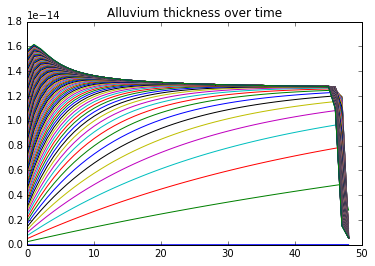

In [296]:
for i in range(num_time_steps):
    S = (z[upper] - z[1:]) / dx
    
    Es = Ks * q[upper] * S * (1.0 - np.exp(-H[upper] / Hstar))
    
    Er = Kr * q[upper] * S * np.exp(-H[upper] / Hstar)
    
    for j in range(num_nodes - 1):
        qs[j] = (((Es[j]) + (1-Ff) * Er[j]) / Voverq[j]) * (1.0 - np.exp(-dx * Voverq[j])) + (qs_in[j] * np.exp(-dx * Voverq[j]))
        qs_in[j+1] = qs[j]
    
    H[upper] += dt * (qs[upper] * Voverq[upper]) - Ks * q[upper] * S *(1.0 - np.exp(-H[upper]/Hstar))
    
    R[upper] += dt * (U - Kr * q[upper] * S * (np.exp(-H[upper] / Hstar)))
    
    if i % 1000 == 0:
        plt.plot(H[:-1])
        plt.title('Alluvium thickness over time')
    
    z = R + H

z

In [263]:
H

array([  4.53618305e-15,   6.19219609e-15,   7.53684188e-15,
         8.62739373e-15,   9.50995463e-15,   1.02235654e-14,
         1.07983622e-14,   1.12603939e-14,   1.16305131e-14,
         1.19270406e-14,   1.21623005e-14,   1.23496858e-14,
         1.24966779e-14,   1.26112067e-14,   1.26998669e-14,
         1.27680099e-14,   1.28189439e-14,   1.28567340e-14,
         1.28840228e-14,   1.29033627e-14,   1.29161520e-14,
         1.29231260e-14,   1.29265036e-14,   1.29257520e-14,
         1.29232472e-14,   1.29181235e-14,   1.29129116e-14,
         1.29056114e-14,   1.28979347e-14,   1.28894168e-14,
         1.28812097e-14,   1.28742922e-14,   1.28643316e-14,
         1.28560154e-14,   1.28473901e-14,   1.28400530e-14,
         1.28306722e-14,   1.28229810e-14,   1.28175095e-14,
         1.28075978e-14,   1.28012619e-14,   1.27951054e-14,
         1.27862391e-14,   1.27841215e-14,   1.27740336e-14,
         1.27725084e-14,   1.27620234e-14,   1.22973193e-14,
         1.64098190e-15,

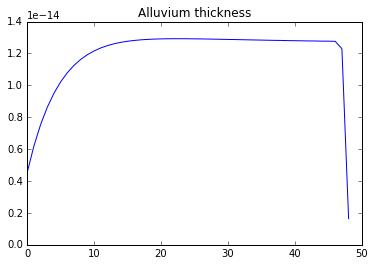

In [264]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(H[:-1])
plt.title('Alluvium thickness')


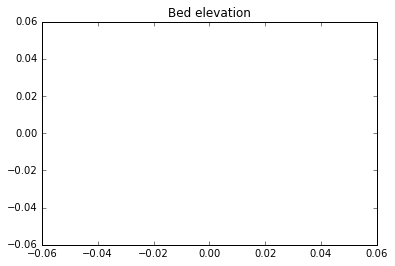

In [256]:
plt.plot(z[:-1])
plt.title('Bed elevation')

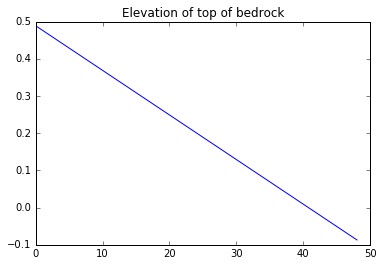

In [241]:
plt.plot(R[:-1])
plt.title('Elevation of top of bedrock')

In [244]:
qs

array([  9.99999994e-04,   2.99999998e-03,   6.00000002e-03,
         9.99999999e-03,   1.49999998e-02,   2.09999995e-02,
         2.79999998e-02,   3.60000004e-02,   4.50000011e-02,
         5.50000020e-02,   6.60000006e-02,   7.80000016e-02,
         9.10000001e-02,   1.05000001e-01,   1.20000002e-01,
         1.36000003e-01,   1.53000001e-01,   1.71000003e-01,
         1.90000006e-01,   2.10000008e-01,   2.31000005e-01,
         2.53000008e-01,   2.76000010e-01,   3.00000012e-01,
         3.25000014e-01,   3.51000019e-01,   3.78000021e-01,
         4.06000013e-01,   4.35000006e-01,   4.65000008e-01,
         4.96000007e-01,   5.28000009e-01,   5.61000005e-01,
         5.95000002e-01,   6.30000009e-01,   6.66000011e-01,
         7.03000009e-01,   7.41000015e-01,   7.80000010e-01,
         8.20000014e-01,   8.61000016e-01,   9.03000031e-01,
         9.46000041e-01,   9.90000025e-01,   1.03500003e+00,
         1.08100001e+00,   1.12800002e+00,   1.17600003e+00,
         1.22500003e+00,